In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import Counter
from sklearn.cluster import AgglomerativeClustering
from src.utils_clustering import *
import time

In [3]:
N_CLASSES = 15

In [4]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [5]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=N_CLASSES, linkage='ward')

# Start measuring time
start_time = time.time()

labels_pred = agglomerative_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds

0.005169077714284261

In [6]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({0: 363, 2: 358, 13: 352, 9: 348, 4: 346, 1: 343, 5: 341, 3: 337, 8: 335, 7: 327, 14: 325, 11: 314, 6: 312, 10: 301, 12: 298})


In [7]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [8]:
clustering_algorithm_name = 'Agglomerative_Clustering_Ward_Linkage'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

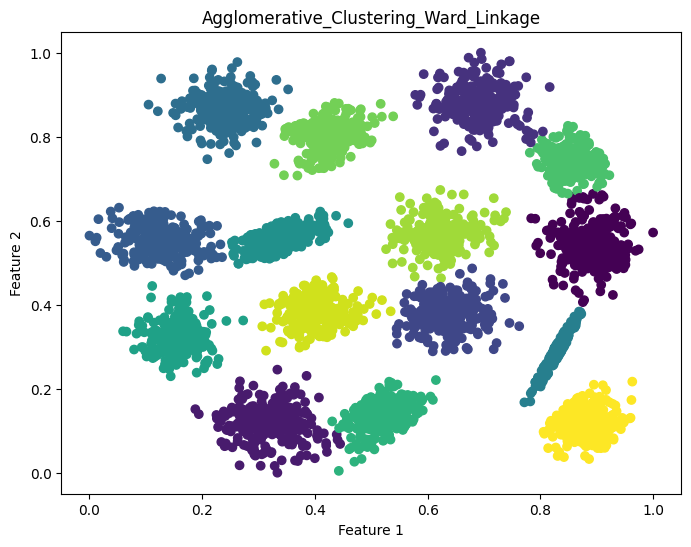

In [9]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [10]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


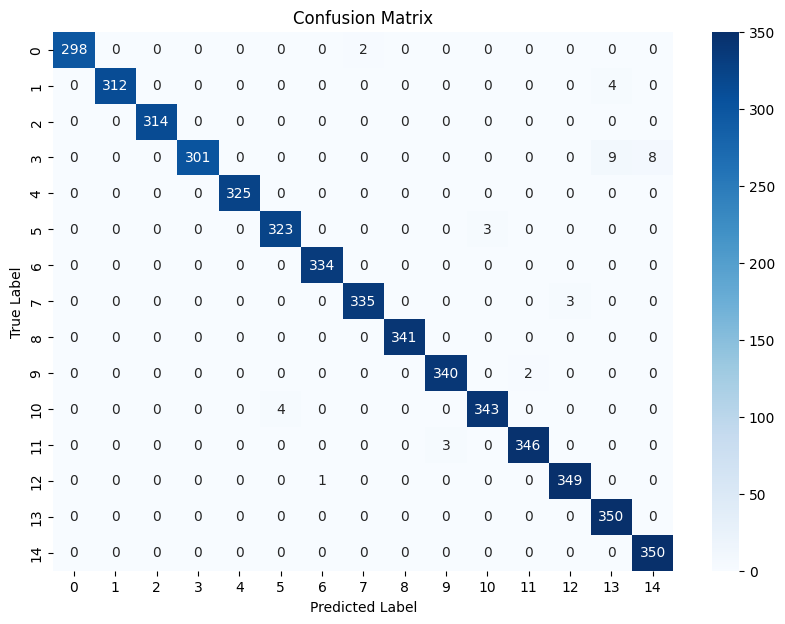


Overall Accuracy: 99.22%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [11]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [12]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path)

TypeError: evaluate_clustering() missing 2 required positional arguments: 'algorithm_details' and 'running_time'